In [12]:
# Install the required libraries
# pip install pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import timedelta

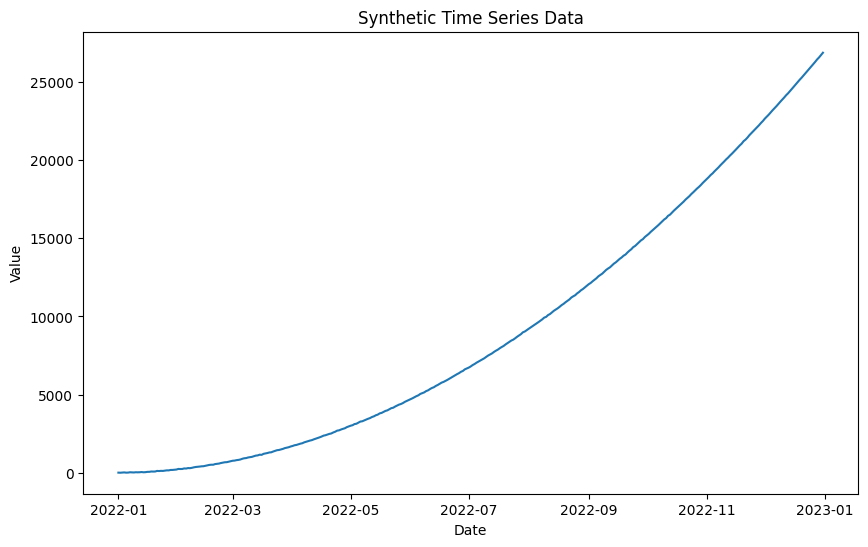

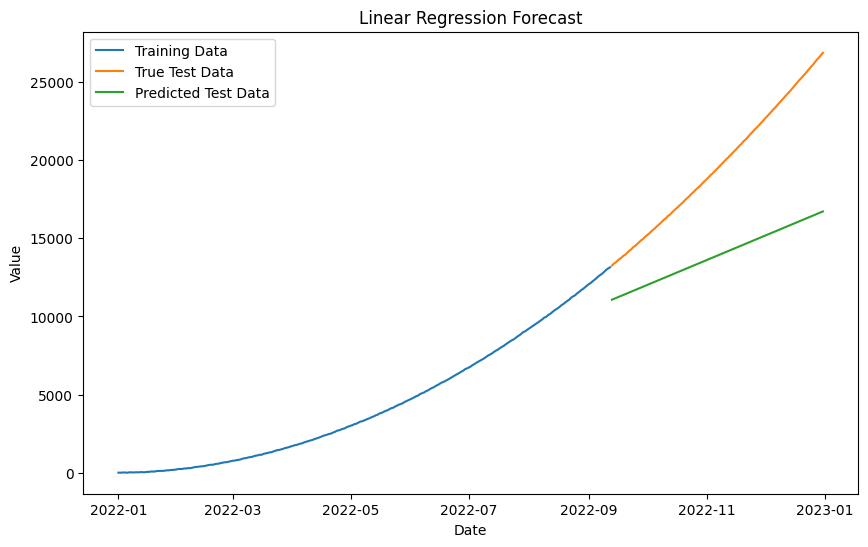

In [16]:
# Create a synthetic time series dataset
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', periods=365, freq='D')
data = pd.DataFrame({
    'ds': date_rng,
    'y': [i + 0.2 * i**2 + np.random.normal(scale=10) for i in range(365)]
})

# Plot the synthetic time series
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'])
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Feature engineering: Adding a column for the number of days since the start
data['days_since_start'] = (data['ds'] - data['ds'].min()).dt.days

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.3, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(train_data[['days_since_start']], train_data['y'])

# Make predictions on the test set
test_data['y_pred'] = model.predict(test_data[['days_since_start']])

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data['ds'], train_data['y'], label='Training Data')
plt.plot(test_data['ds'], test_data['y'], label='True Test Data')
plt.plot(test_data['ds'], test_data['y_pred'], label='Predicted Test Data')
plt.title('Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [14]:
data.head()

,ds,y,days_since_start
0,2022-01-01,4.967142,0
1,2022-01-02,-0.182643,1
2,2022-01-03,9.276885,2
3,2022-01-04,20.030299,3
4,2022-01-05,4.858466,4
